# K-Nearest Neighbors
Find "k" nearest neighbors and predict the class of a new observation based on the frequency of the classes of those neighbors.

## Import Libraries

In [56]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

## Import Dataset

In [57]:
dataset = pd.read_csv("datasets/social_network_ads.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Split Dataset

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42)

## Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Create Model

In [60]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Make Predictions

In [61]:
y_pred = classifier.predict(X_test)

np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


In [62]:
classifier.predict(sc.transform([[ 30, 200000 ]]))

array([1], dtype=int64)

## Create Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[59  4]
 [ 3 34]]
0.93


## Visualize Results

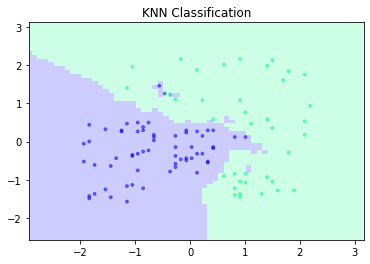

In [64]:
xmin, xmax = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
ymin, ymax = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.1), np.arange(ymin, ymax, 0.1))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="winter", s=8, alpha=0.5)
plt.pcolormesh(xx, yy, Z, cmap="winter", alpha=0.2)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN Classification")
plt.show()
